In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lemmatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from sklearn.datasets import fetch_20newsgroups
remove=('headers', 'footers', 'quotes')
dataset = fetch_20newsgroups(subset='train',remove=remove).data

In [ ]:
dataset[:10]

['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
 "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't an

In [ ]:
type(dataset)

list

In [ ]:
len(dataset)

11314

In [ ]:
texts = pd.DataFrame({'news': dataset})

In [ ]:
texts.head()

,news
0,I was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh..."
3,\nDo you have Weitek's address/phone number? ...
4,"From article <C5owCB.n3p@world.std.com>, by to..."


In [ ]:
def clean_text(headline):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(headline)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [ ]:
texts['news']=texts['news'].apply(clean_text)

In [ ]:
texts.head()

,news
0,wondering anyone could enlighten 2-door sport ...
1,fair number brave soul upgraded clock oscillat...
2,well folk plus finally gave ghost weekend star...
3,Weitek address/phone number like information chip
4,From article C5owCB.n3p world.std.com tombaker...


In [ ]:
vect = TfidfVectorizer(stop_words=stop_words,max_features=1000,ngram_range = (1,3)) 
vect_text = vect.fit_transform(texts['news'])

In [ ]:
print(vect_text.shape)
print(vect_text)

(11314, 1000)
  (0, 540)	0.1574284690254156
  (0, 675)	0.13767794586815532
  (0, 531)	0.16699720038545146
  (0, 454)	0.1863934928694376
  (0, 967)	0.19408086579971467
  (0, 433)	0.19477802016765755
  (0, 538)	0.15201075805672337
  (0, 997)	0.1283481955788305
  (0, 315)	0.21851425898399218
  (0, 596)	0.162524573948482
  (0, 581)	0.19353134889088183
  (0, 487)	0.10701358852243859
  (0, 146)	0.19606279590078013
  (0, 756)	0.19114372297703552
  (0, 381)	0.20349583503632665
  (0, 53)	0.2187622682279371
  (0, 821)	0.178062641150358
  (0, 731)	0.14098554501920954
  (0, 163)	0.16563988374577474
  (0, 299)	0.19891134153527606
  (0, 496)	0.21705616675067488
  (0, 530)	0.21231771715425457
  (0, 292)	0.44588669171468454
  (0, 238)	0.11871380737085444
  (0, 82)	0.25970254341226356
  :	:
  (11312, 750)	0.2483162686060829
  (11312, 418)	0.23524467813394578
  (11312, 854)	0.25793328851060937
  (11312, 837)	0.4260109641320658
  (11312, 721)	0.19837723158602252
  (11312, 937)	0.2164062036774874
  (11312

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_topic = lsa_model.fit_transform(vect_text)

In [ ]:
print(lsa_topic)

[[ 0.19600916  0.0819971   0.04548195 ...  0.02025695  0.08596028
   0.0391218 ]
 [ 0.1316118   0.16855935  0.0481744  ...  0.0510535  -0.01394418
  -0.06639821]
 [ 0.32406311  0.07689734  0.03065931 ...  0.00835038 -0.00643062
   0.09320049]
 ...
 [ 0.17605282  0.0312989   0.00185328 ...  0.09184928  0.08357607
   0.10959364]
 [ 0.12724296 -0.04676449 -0.02468508 ... -0.05370956  0.01144861
  -0.04657299]
 [ 0.09383589  0.03205739  0.00874869 ...  0.035333    0.07121217
   0.01360879]]


In [ ]:
print(lsa_topic.shape)

(11314, 10)


In [ ]:
l=lsa_topic[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  19.600916415671634
Topic  1  :  8.199709788597604
Topic  2  :  4.548194652708131
Topic  3  :  -14.0500232692285
Topic  4  :  -9.606053159266393
Topic  5  :  2.4121875805508024
Topic  6  :  -10.627822957387453
Topic  7  :  2.0256946640033933
Topic  8  :  8.596028452279622
Topic  9  :  3.9121796140287017


In [ ]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
would like know people think time could good year also 

Topic 1: 
thanks file card drive please anyone windows window mail program 

Topic 2: 
game team year player season play last hockey drive league 

Topic 3: 
drive disk scsi problem card hard system floppy work controller 

Topic 4: 
file window windows program problem directory edu using image version 

Topic 5: 
edu please mail com email sale 00 offer address send 

Topic 6: 
would like edu would like chip system encryption key clipper phone 

Topic 7: 
card driver video monitor chip color mode work window know 

Topic 8: 
chip anyone government system encryption clipper key phone anyone know number 

Topic 9: 
bike like good edu look know thing problem sound much 



In [ ]:
Final_Topics = []
for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    st=''
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    for t in sorted_words:
        st = st + t[0] + " "
    Final_Topics.append(st)
Final_Topics

['would like know people think time could good year also ',
 'thanks file card drive please anyone windows window mail program ',
 'game team year player season play last hockey drive league ',
 'drive disk scsi problem card hard system floppy work controller ',
 'file window windows program problem directory edu using image version ',
 'edu please mail com email sale 00 offer address send ',
 'would like edu would like chip system encryption key clipper phone ',
 'card driver video monitor chip color mode work window know ',
 'chip anyone government system encryption clipper key phone anyone know number ',
 'bike like good edu look know thing problem sound much ']

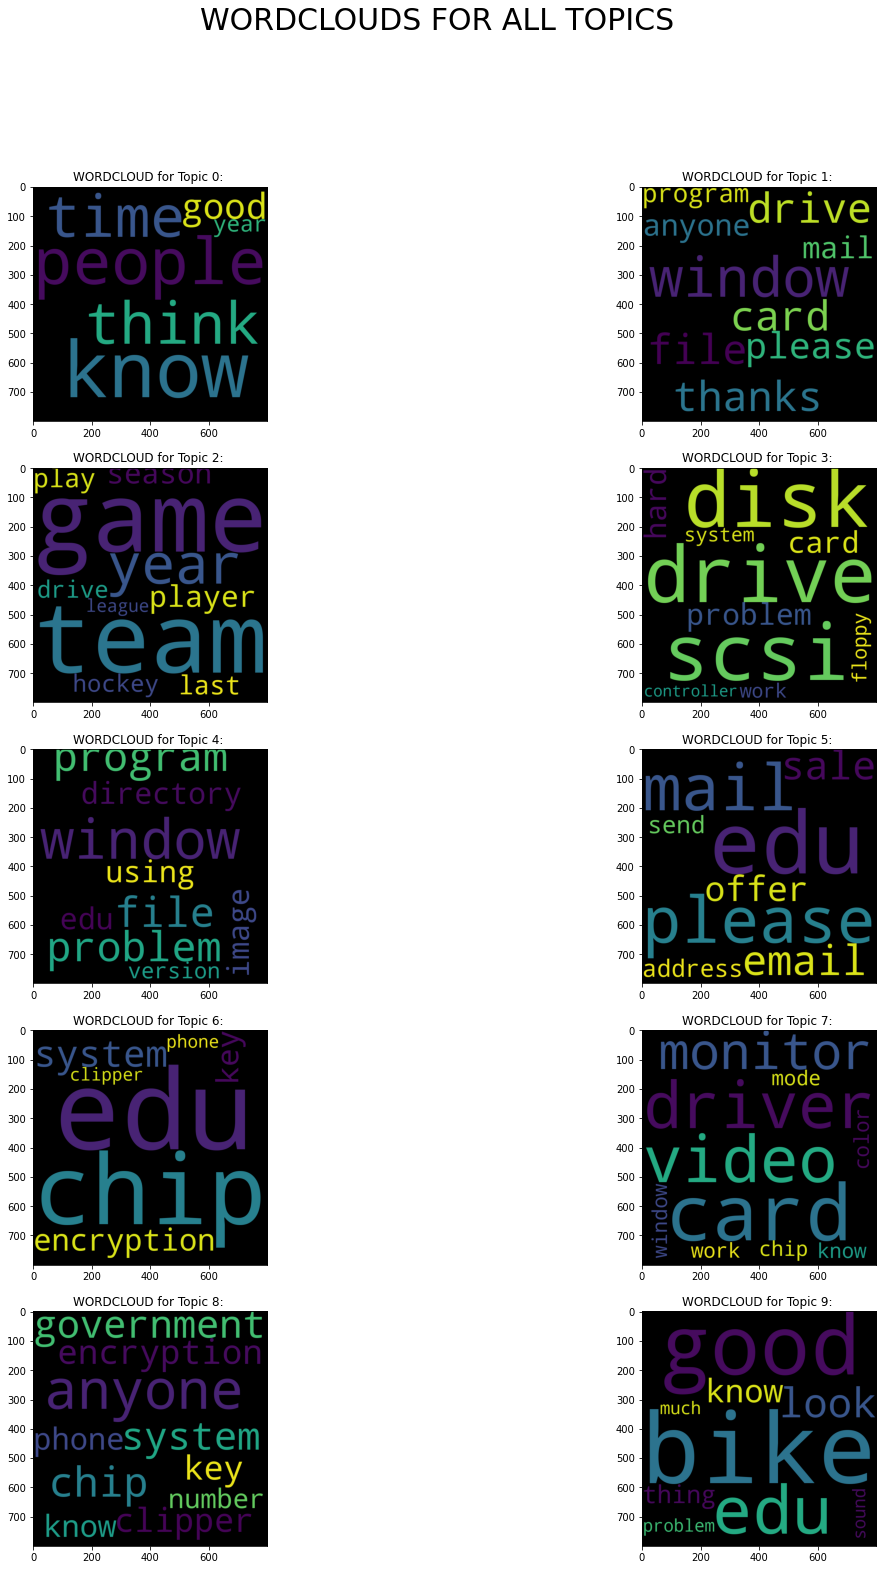

In [ ]:
from wordcloud import WordCloud 
fig,axis=plt.subplots(5,2,figsize=(20,25))
a,b=-1,0
fig.suptitle("WORDCLOUDS FOR ALL TOPICS", fontsize=30)
for i in range(10):
    if i%2==0: a+=1
    wc = WordCloud(background_color="black", width=800, height=800, random_state=1).generate(Final_Topics[i])
    axis[a][b].imshow(wc)
    axis[a][b].set_title("WORDCLOUD for Topic "+str(i)+": ")
    b+=1
    if b>1:b=0